In [6]:
import akshare as ak
import pandas as pd
import matplotlib.pyplot as plt
from pylab import legend
%matplotlib inline

In [7]:
sykt_net_value_raw = pd.read_csv('../output/三羊开泰/2022-净值.csv')
sykt_net_value_raw.rename(columns={'时间':'date'}, inplace=True)
sykt_net_value_raw['date'] = pd.to_datetime(sykt_net_value_raw['date'])
# sykt_net_value_raw

In [8]:
sindex = 'sh000300' #对比指数
index_daily_df = pd.read_csv(f'../output/指数/{sindex}_daily_history.csv', index_col='id')
index_daily_df['date'] = pd.to_datetime(index_daily_df['date'])
index_daily_df.columns = ['date', 'i_open', 'i_high', 'i_low', 'i_close', 'i_volume']
# index_daily_df

In [9]:
merged_df = pd.merge(sykt_net_value_raw, index_daily_df, how='left', on='date')

plt_df = merged_df[['date', '净值', 'i_close']]
# plt_df

FileNotFoundError: [Errno 2] No such file or directory: './output/沪深300 vs 三羊开泰.jpeg'

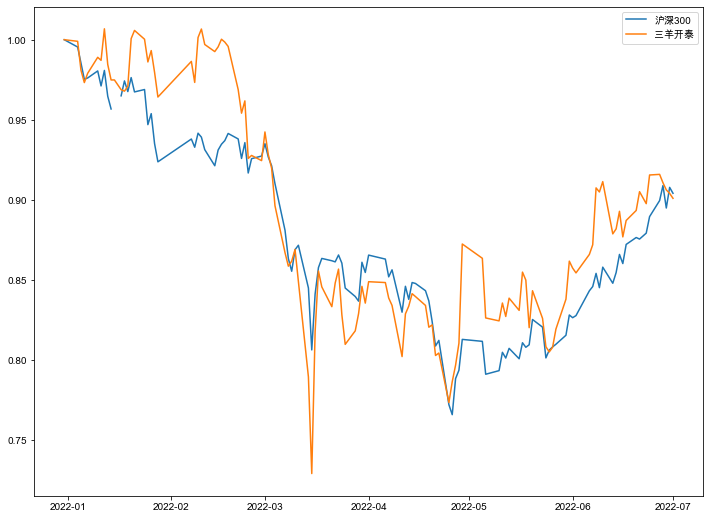

In [10]:
plt.rcParams["font.family"] = 'Arial Unicode MS'  # 设置字体，正常显示中文
plt.rcParams['axes.unicode_minus'] = False  # 设置字体，正常显示中文
plt.figure(figsize=(12, 9))

plt.plot(plt_df['date'], plt_df['i_close']/4940.373, label='沪深300')
plt.plot(plt_df['date'], plt_df['净值']/2.0735, label='三羊开泰')

# plt.axis('tight')

plt.legend(loc='best')
plt.savefig('../output/沪深300 vs 三羊开泰.jpeg')